In [1]:
library(dplyr)
library(lubridate)
library('ggplot2') 
library('ggthemes') 
library(magick)
library(grid)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
Disabled features: cairo, ghostscript, rsvg, webp



In [4]:
# Load Arctic Sea Ice Extent data
# Source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv
# Downloaded on 22nd May 2020 (last day of the dataset)
seaice_N = read.csv("./data/N_seaice_extent_daily_v3.0.csv", stringsAsFactors=FALSE)

# Have a look at the table
head(seaice_N)
tail(seaice_N)

,Year,Month,Day,Extent,Missing,Source.Data
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html
2,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19781026_n07_v1.1_n.bin']
3,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19781028_n07_v1.1_n.bin']
4,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19781030_n07_v1.1_n.bin']
5,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19781101_n07_v1.1_n.bin']
6,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19781103_n07_v1.1_n.bin']


,Year,Month,Day,Extent,Missing,Source.Data
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
13530,2020,05,17,12.242,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.16/nt_20200516_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.17/nt_20200517_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.18/nt_20200518_f18_nrt_n.bin']"
13531,2020,05,18,12.187,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.17/nt_20200517_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.18/nt_20200518_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.19/nt_20200519_f18_nrt_n.bin']"
13532,2020,05,19,12.139,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.18/nt_20200518_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.19/nt_20200519_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.20/nt_20200520_f18_nrt_n.bin']"
13533,2020,05,20,12.158,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.19/nt_20200519_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.20/nt_20200520_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.21/nt_20200521_f18_nrt_n.bin']"
13534,2020,05,21,12.121,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.20/nt_20200520_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.21/nt_20200521_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.22/nt_20200522_f18_nrt_n.bin']"
13535,2020,05,22,11.959,0.000,"['/ecs/DP1/PM/NSIDC-0081.001/2020.05.21/nt_20200521_f18_nrt_n.bin', '/ecs/DP1/PM/NSIDC-0081.001/2020.05.22/nt_20200522_f18_nrt_n.bin']"


In [6]:
# The first row of each column doesn't contain data, so remove it
seaice_N = seaice_N[-c(1),]

In [7]:
# Convert factors into integers
seaice_N$Year = as.integer(seaice_N$Year)
seaice_N$Month = as.integer(seaice_N$Month)
seaice_N$Day = as.integer(seaice_N$Day)

# Convert the Sea Ice Extent into numeric class
seaice_N$Extent = as.numeric(seaice_N$Extent)
seaice_N$Missing = as.numeric(seaice_N$Missing)

In [8]:
# No missing values in the extent series
sum(is.na(seaice_N$Extent)) 

[1] 0

In [9]:
seaice_N = seaice_N %>%
  select(-Source.Data, -Missing) %>% # Remove Source.Data and Missing columns
  mutate(Date = ymd(paste(Year, Month, Day, sep = "-"))) # Create Date column

ice = seaice_N %>%
  group_by(Year,Month) %>%
  summarize(avg_extent=mean(Extent)) 

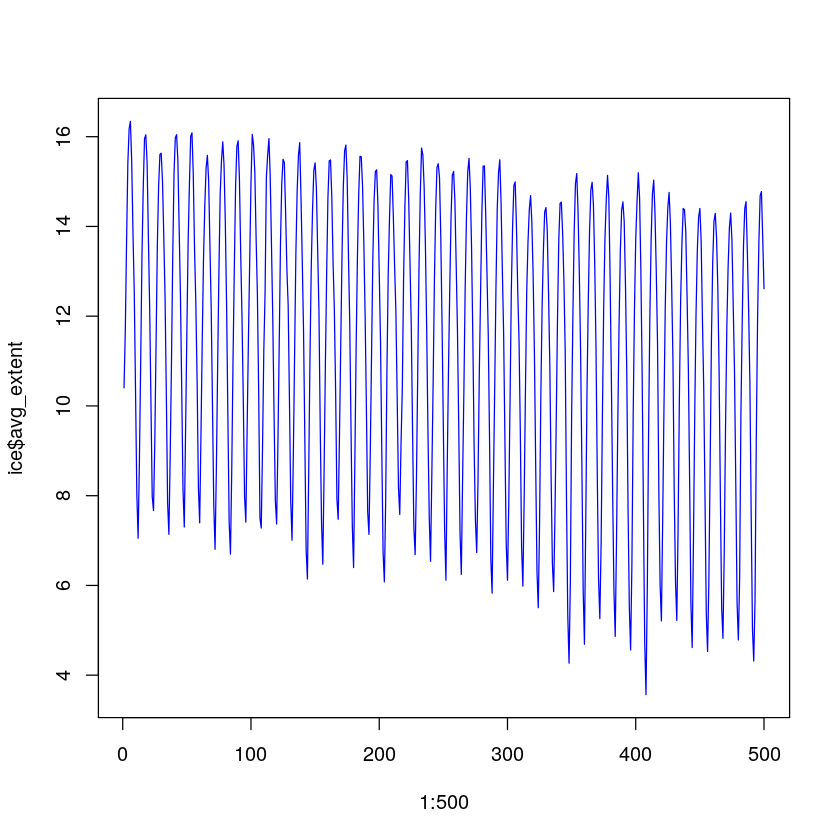

In [10]:
# Plotting all months doesn't provide any information
plot(1:500, ice$avg_extent, type = 'l', col='blue')

In [11]:
# To make the annual mean, remove the incomplete years
# That's the months of 1978 and 2020
annual_mean = ice[-c(1, 2, 3, 496, 497, 498, 499, 500),]

annual_mean = annual_mean %>%
  group_by(Year) %>%
  summarize(annual_extent=mean(avg_extent))

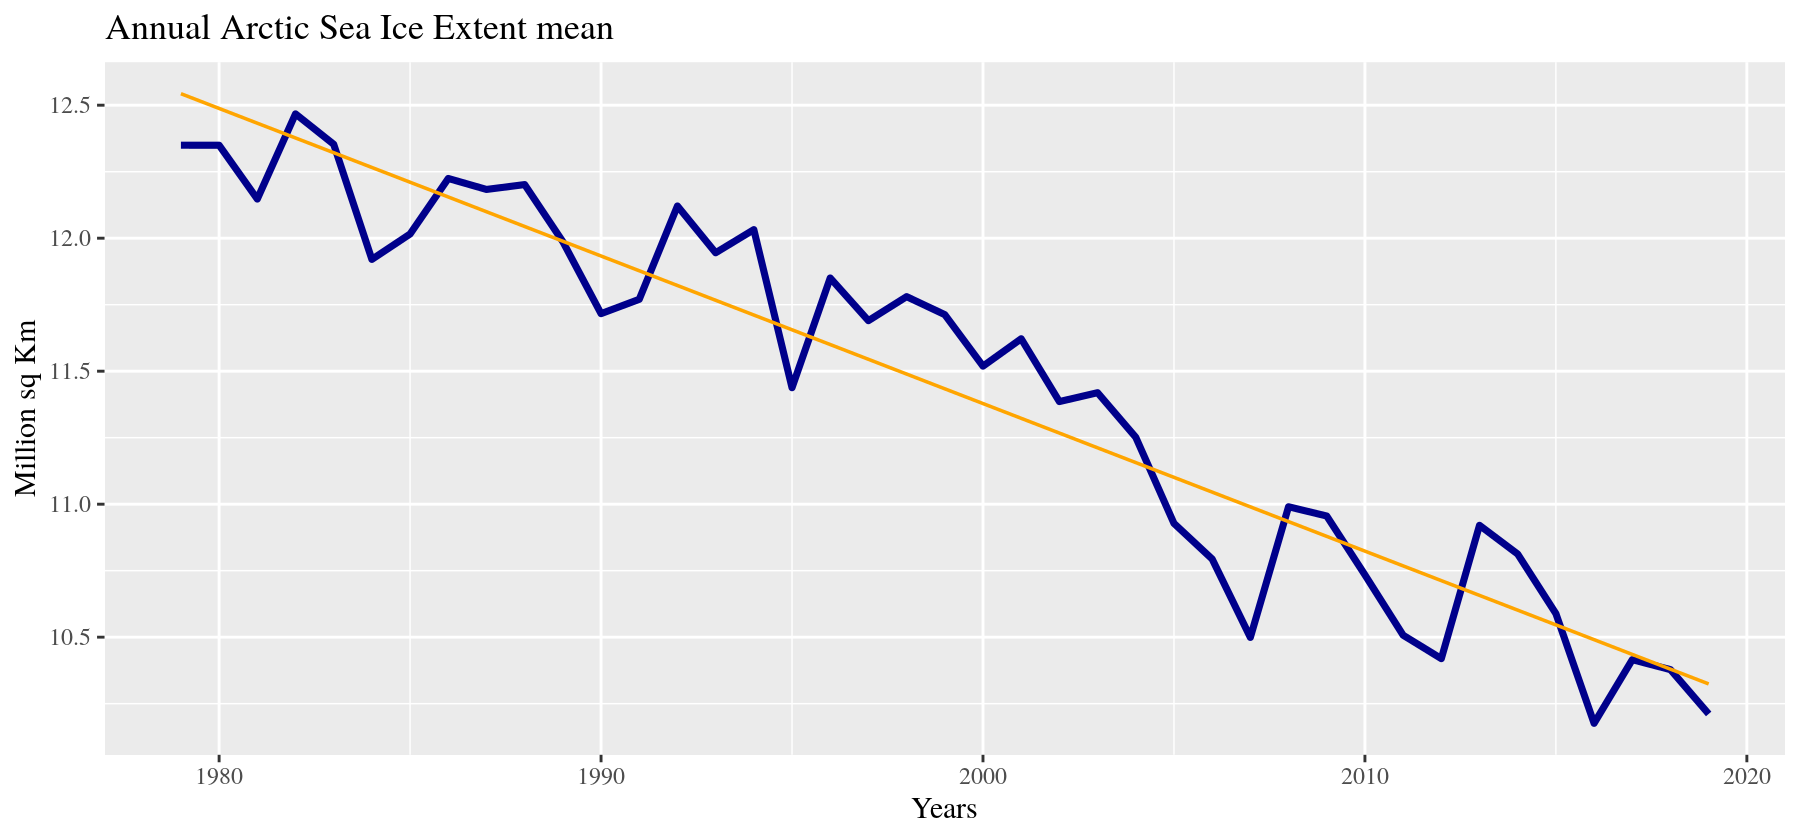

In [35]:
# Plot the annual mean time series
options(repr.plot.width=15, repr.plot.height=7)
ggplot(annual_mean, aes(Year, annual_extent)) + labs(x='Years', y='Million sq Km') +
  geom_line(size=2, color = 'darkblue') + 
  labs(title="Annual Arctic Sea Ice Extent mean", fill="e")  +
  theme_gray(base_size = 18, base_family = "Times") +
  geom_smooth(method = "lm", se = FALSE, color='orange', formula = y ~ x) 

In [36]:
# Annual Minimum Sea Ice Extent (September)
ice_september = ice[seq(12,500,12),]

In [37]:
# Load the Sea Ice Concentration maps. Let's add them to the figure
# Source: "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/images/09_Sep/N_201209_conc_blmrbl_v3.0.png"
sic_sep12 = image_read(paste("./data/N_201209_conc_blmrbl_v3.0.png", sep=''))
sic_sep80 = image_read(paste("./data/N_198009_conc_blmrbl_v3.0.png", sep=''))

# Transform into graphic object
g_12 =  rasterGrob(sic_sep12, interpolate=FALSE)
g_80 =  rasterGrob(sic_sep80, interpolate=FALSE)

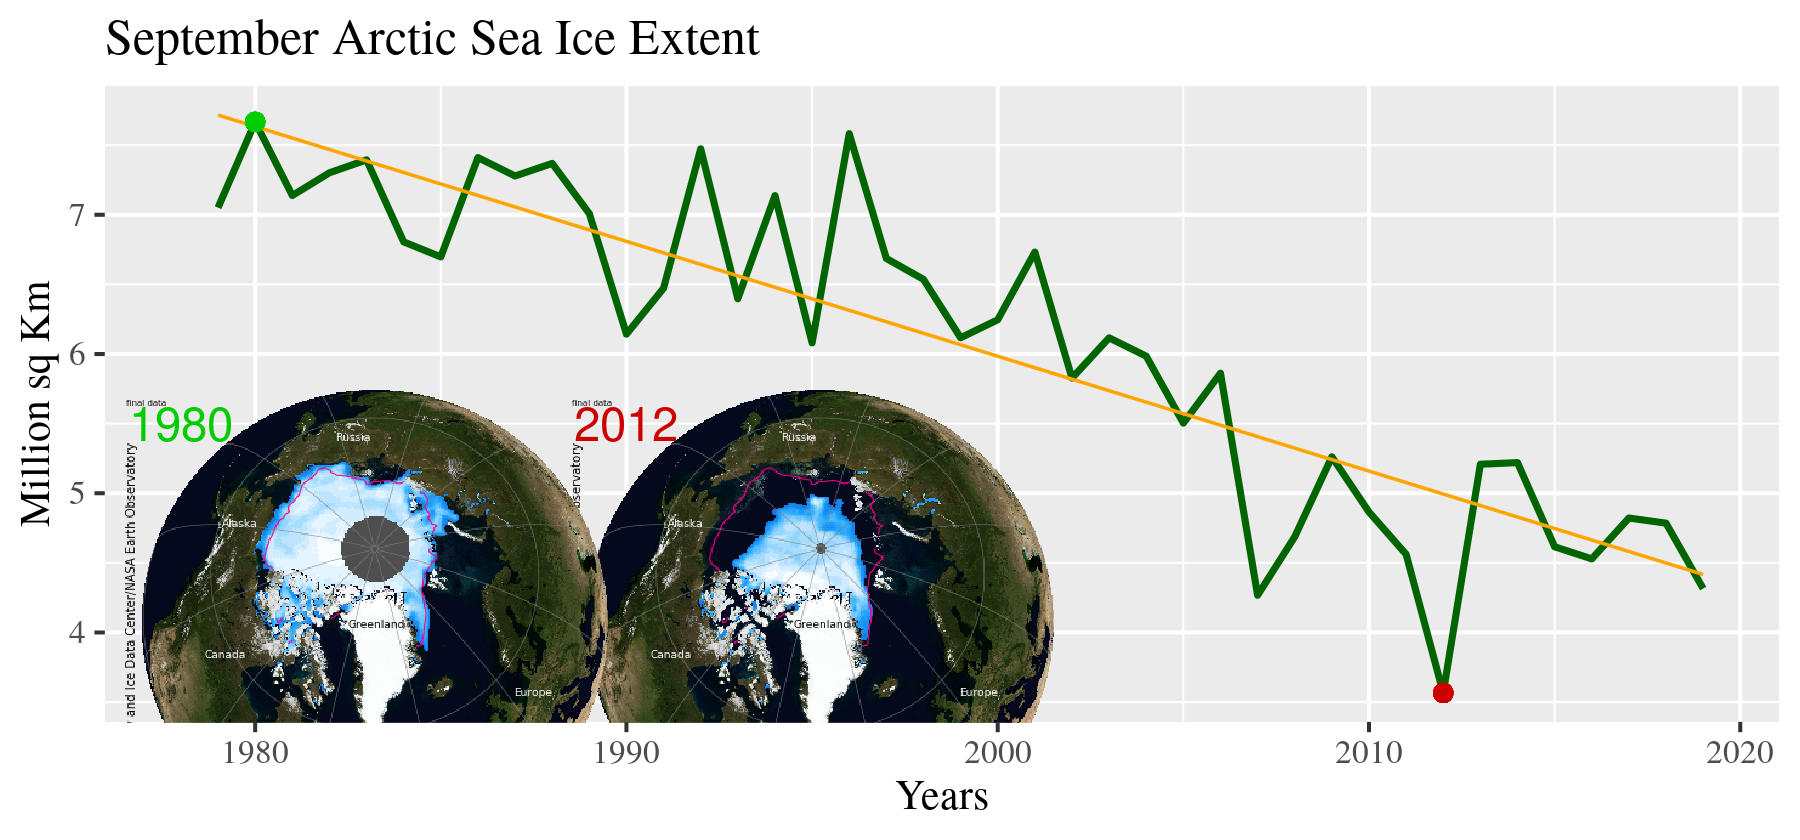

In [52]:
# Plot all Septembers, with the map figures
options(repr.plot.width=15, repr.plot.height=7)
ggplot(ice_september, aes(Year, avg_extent)) + labs(x='Years', y='Million sq Km') +
  geom_line(size=2, color = 'darkgreen') + 
  labs(title="September Arctic Sea Ice Extent", fill="e")  +
  theme_gray(base_size = 25, base_family = "Times") +
  geom_smooth(method = "lm", se = FALSE, color='orange', formula = y ~ x) +
  annotation_custom(grob=g_12, xmin=1985, xmax=2005, ymin=2, ymax=5.75) +
  annotation_custom(grob=g_80, xmin=1973, xmax=1993, ymin=2, ymax=5.75) +
  geom_point(aes(x=1980, y=as.numeric(ice_september[2,3])), colour="green3",
             fill="green3", shape=21, size=5) +
  geom_point(aes(x=2012, y=as.numeric(ice_september[34,3])), colour="red3",
             fill="red3", shape=21, size=5) +
  annotate(geom="text", x=1978, y=5.5, label="1980",
           color="green3", size = 10) +
  annotate(geom="text", x=1990, y=5.5, label="2012",
           color="red3", size = 10) 
